## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>


This dataset contain information of hotel booking, We will perform exploratory data analysis to get insight from the data.

We will try to analyze the important factors that governs the bookings in the following steps:

1. We will try to find out  the **Total number of Hotel Bookings that were get  Cancelled.**
2. Then we will find the **Booking Ratio between Resort Hotel and City Hotel.**
3. Now We will find **Hotel Booking Pecentage for Each Year.**
4. After all of these We'll try to get **Most busiest month for the Hotel.**
5. Find out the **Country From which we get Most number of guests.**
6. We will try to get for **How Long People Stay in the hotel.**
7. At last will try to get the **Most booked accommodation type (Single, Couple, Family/Friends).**




In [38]:
#importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px






In [2]:
#Mounting google drive and Importing csv file

In [4]:
from google.colab import drive
drive.mount('/content/drive')
file_path='/content/drive/MyDrive/HOTEL BOOKING ANALYSIS/Hotel Bookings.csv'
df_hba=pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#find out size of data
df_hba.shape

(119390, 32)

In [6]:
df_hba.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## **Columns Detail Description**

1. **hotel**: type of hotels 



             H1: Resort hotel
             H2: City hotel




2. **is_canceled**: canceled or not


             1: Canceled
             0: Not canceled



3. **lead_time**:
 

           no. of days before actual arrival in the hotel.



4. **arrival_date_year** :  Year of arrival date (2015-2017).
5. **arrival_date_month**:  Month of arrival date (Jan - Dec).
6. **arrival_date_week_number**: Week number of year for arrival date (1-53).
7. **arrival_date_day_of_month**: Day of arrival date.          
8. **stays_in_weekend_nights**: No of weekend nights (Sat/Sun) the guest stayed or booked to stay at the hotel.
9. **stays_in_week_nights**: No of week nights (Mon - Fri) the guest stayed or booked to stay at the hotel.                 
10. **adults**                               
11. **children**                          
12. **babies**                                
13. **meal**:       
            BB – Bed & Breakfast
            HB – only two meals including breakfast meal
            FB – breakfast, lunch, and dinner
14. **country**                           
15. **market_segment**: a group of people who share one or more common characteristics, lumped together for marketing purposes).  
            TA: Travel agents
            TO: Tour operators                       
16. **distribution_channel**: A distribution channel is a chain of businesses or intermediaries through which a good or service passes until it reaches the final buyer or the end consumer. 


            TA: Travel agents
            TO: Tour operators


17. **is_repeated_guest**: value indicating if the booking name was from repeated guest.


            1: Yes
            0: No


18. **previous_cancellations: cancellation in past** : Number of previous bookings that were cancelled by the customer prior to the current booking.                 
19. **previous_bookings_not_canceled: not cancelled in past** : Number of previous bookings not cancelled by the customer prior to the current booking.        
20. **reserved_room_type** : Code of room type reserved. Code is presented instead of designation for anonymity reasons.                     
21. **assigned_room_type** : Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.                    
22. **booking_changes** : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.                        
23. **deposit_type** : Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.                           
24. **agent** : ID of the travel agency that made the booking.                              
25. **company** : ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons.                           
26. **days_in_waiting_list** : Number of days the booking was in the waiting list before it was confirmed to the customer.                  
27. **customer_type** : 


        Contract - when the booking has an allotment or other type of contract associated to it;
        Group – when the booking is associated to a group;
        Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
        Transient-party – when the booking is transient, but is associated to at least other transient booking


28. **adr:average daily rate** : average daily rate =Sum Of All Lodging Transaction / Total Number Of Staying Night.                                   
29. **required_car_parking_spaces** : Number of car parking spaces required by the customer.            
30. **total_of_special_requests** : Number of special requests made by the customer (e.g. twin bed or high floor).
                 
31. **reservation_status** :                      

          Canceled – booking was canceled by the customer;
          Check-Out – customer has checked in but already departed;
          No-Show – customer did not check-in and did inform the hotel of the reason why

32. **reservation_status_date** : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel.

"Get a concise summary of the dataframe."


In [7]:
df_hba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

First we will make a copy of hotel booking data so that our original hotel booking data remain unchanged.


In [8]:
df1=df_hba.copy()

## **DATA PREPROCESING**

**Step-1: is to find out the null values present in this datasheet**

In [9]:
df1.isnull().sum().sort_values(ascending=False)[:]

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 


>"So we saw here that there are **total 4 columns** which **contains null values**.So we have to perform some action to them."






>"**agent** and the **company** columns **contain id_numbers**.
so for all the missing values, we will just **replace it with 0.**



In [10]:
df1[['agent','company']]=df1[['agent','company']].fillna(0.0)

> "The column named **'country'** contains **country codes** representing different countries."
* It is a categorical feature so We will also replace it with the **mode
value**. "mode value (country that appears the most often)"



In [11]:
df1['country'].fillna(df_hba.country.mode().to_string(),inplace=True)

In [12]:
df1['country']

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

> "The column named **'children'** contains the **count of children**,In this we will **replace** all the missing values with the **mean value rounded off.**"



In [13]:
df1['children'].fillna(round(df_hba.children.mean()),inplace=True)



> "**Rows** that have **Zero guests** including adults, children and babies. These type of rows does not used in analysis.So we will **remove them.**"




In [14]:
df1[(df1.children+df1.adults+df1.babies)==0].shape

(180, 32)



> Here We have **180 rows** .So we will just remove these rows.



In [15]:
# Drop Rows where there is no adult, baby and child

In [16]:
df1=df1.drop(df1[(df1.children+df1.adults+df1.babies)==0].index)

**Step-2:Converting Datatype**

In [17]:
df1.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             



> "There are some **columns** like **children, company and agent**
that are **float type** but their values are only in integers.
So we will **convert them to the integer type.**"



In [18]:
#convert datatype of these columns from float to integer

In [19]:
df1[['children','company','agent']]=df1[['children','company','agent']].astype('int64')

## **Exploratory Data Analysis**

**Now We will try to execute each of our step to get the information from our data and try to get the result.**



**A.We will find out how many total number of Bookings were cancelled**



"Let’s write the function to get the percentage of different values."         
"This function takes a series or data frame column and returns the two arrays."

In [20]:
def get_count(series, limit=None):
    
    '''
    INPUT:
        series: Pandas Series (Single Column from DataFrame)
        limit:  If value given, limit the output value to first limit samples.
    OUTPUT:
        x = Unique values
        y = Count of unique values
    '''
    
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

In [21]:
# x is our unique values
# y is the percentage value of each unique value

"Now let’s use this function on our **is_canceled feature** and see the result".

In [22]:
x,y = get_count(df1['is_canceled'])

In [23]:
x,y

(array([0, 1]), array([62.92341247, 37.07658753]))

**is_canceled** will have two unique values:**1 if booking got canceled, else 0**

"ploting bar chart using seaborn"

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


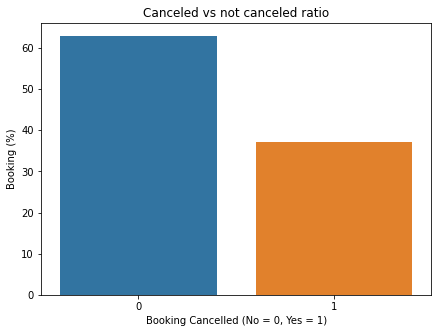

In [24]:
plt.figure(figsize=(7,5))
sns.barplot(x,y)
plt.xlabel('Booking Cancelled (No = 0, Yes = 1)')
plt.ylabel('Booking (%)')
plt.title('Canceled vs not canceled ratio')


plt.show()



> "**Bookings got canceled 37% of the time. While booking guest did checkd-in (did not cancel the booking ) almost 63% of the time.**"



"For further analysis, We will select only those bookings which did not get canceled"

In [25]:
df_not_canceled = df1[df1['is_canceled'] == 0]

In [26]:
df_not_canceled

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394,0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9,0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89,0,0,Transient,104.40,0,0,Check-Out,2017-09-07


Which Hotel has most Cancellations

In [27]:
# df1.hotel['is_canceled'==0]
# df2=dff.groupby('hotel')['is_canceled'].count()
# df2


**B.Now we will find the "Booking Ratio" between City Hotel and Resort Hotel**



In [28]:
x,y = get_count(df_not_canceled['hotel'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


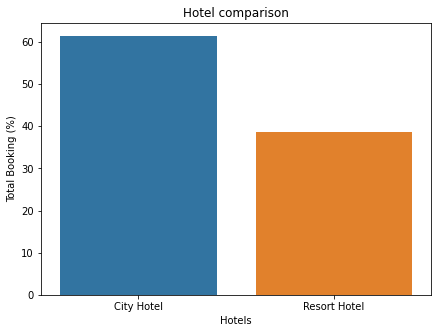

In [29]:
plt.figure(figsize=(7,5))
sns.barplot(x,y)
plt.xlabel('Hotels')
plt.ylabel('Total Booking (%)')
plt.title('Hotel comparison')


plt.show()


>**"More than 60% of the population booked the City hotel"**









**C. Finding Hotel Booking Pecentage for Each Year**



In [30]:
x,y = get_count(df_not_canceled['arrival_date_year'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


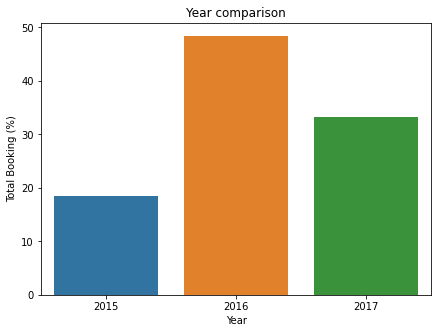

In [31]:
plt.figure(figsize=(7,5))
sns.barplot(x,y)
plt.xlabel('Year')
plt.ylabel('Total Booking (%)')
plt.title('Year comparison')


plt.show()



> **"More than double bookings were made in 2016, compared to the previous year. 
But the bookings decreased by almost 15% the next year."**





> **Let’s separate it by the hotel and then plot the diagram**



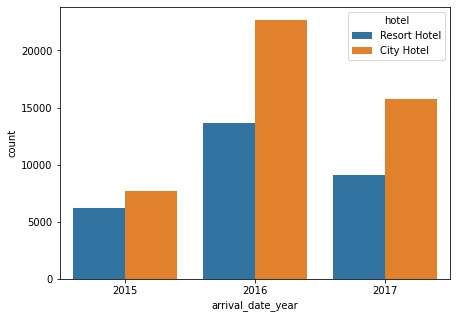

In [32]:
plt.subplots(figsize=(7,5))
sns.countplot(x='arrival_date_year', hue='hotel',  data=df_not_canceled);

**D.Now We'll try to get busiest month for the Hotels**

Text(0, 0.5, 'Count')

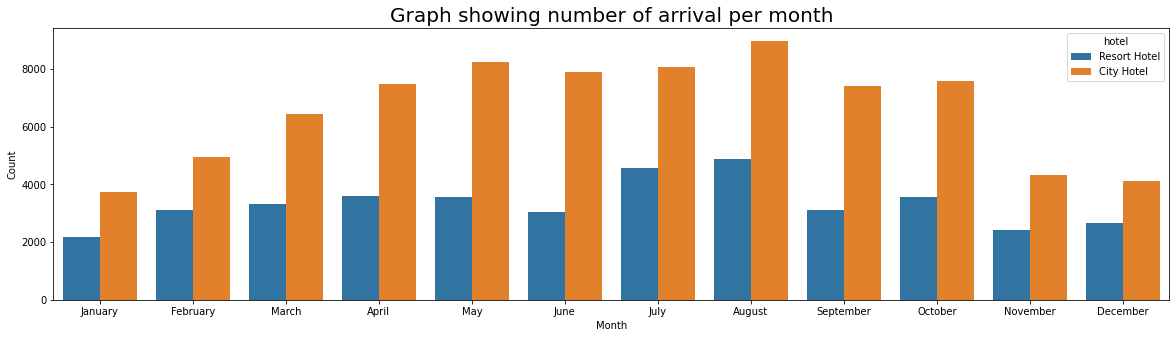

In [33]:
period_arrival = df1[['hotel', 'arrival_date_year', 'arrival_date_month','arrival_date_day_of_month']]
plt.figure(figsize=(20,5))

sns.countplot(data = period_arrival, x = 'arrival_date_month', hue = 'hotel', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']).set_title('Graph showing number of arrival per month',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Count')

**So what we see?**


> **we can see that 2016 seems to be the year where hotel booking is at its highest. We also see an increasing trend in booking around the middle of the year, with August being the highest. Summer ends around August, followed straight by autumn. It seems that summer period is a peak period for hotel booking.
We do notice a roller coaster trend for the arrival day of month. **







**E.Let's find out the country From which we get most number of guests.**

In [34]:
df1['country'].value_counts().head(10)

PRT    48483
GBR    12120
FRA    10401
ESP     8560
DEU     7285
ITA     3761
IRL     3374
BEL     2342
BRA     2222
NLD     2103
Name: country, dtype: int64

Making a data frame containing rows with top 10 countries only.

In [35]:
top10 = df1[df1['country'].isin(["PRT","GBR","FRA","ESP","DEU","ITA","IRL",
                         "BEL","BRA","NLD"])]

Plotting the bar plot of top 10 countries.


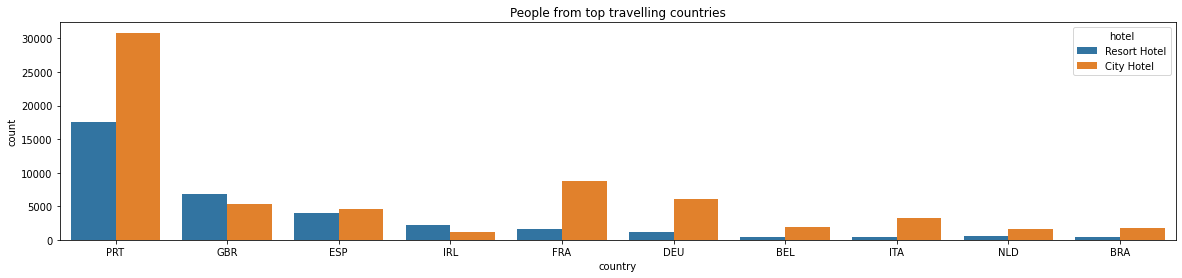

In [36]:
plt.figure(figsize=(20,4))
sns.countplot(x='country', hue = 'hotel', data= top10)
plt.title('People from top travelling countries')
plt.show()

In [39]:
temp = df1['country'].value_counts().reset_index().rename(columns={'index':'country','country':'count'})
guest_map = px.choropleth(temp,
                          locations=temp['country'],
                          color=np.log(temp['count']), 
                          hover_name=temp['country'], 
                          color_continuous_scale=px.colors.sequential.Plasma,
                          title="Home country of guests")
guest_map.show()




> *   We have a huge number of visitors from western europe, namely **France,UK and Portugal** being the highest.
*   we can instruct the marketing team to target people of this region.





**F.Now We will  Find for how Long People Stay in the hotel**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Night Stay Duration (Top 10)')

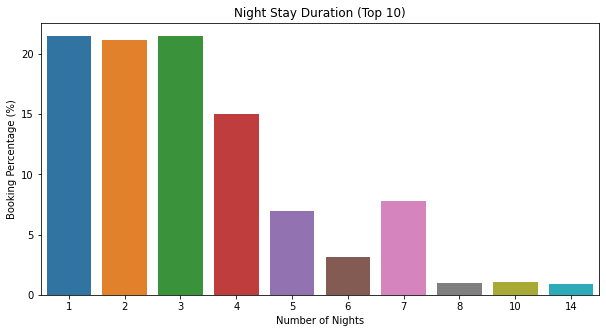

In [40]:
total_nights = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']
x,y = get_count(total_nights, limit=10)

plt.figure(figsize=(10,5))
sns.barplot(x,y)
plt.xlabel('Number of Nights')
plt.ylabel('Booking Percentage (%)')
plt.title('Night Stay Duration (Top 10)')






* **Couple (or 2 adults) is the most popular accommodation type. So hotels can make plans accordingly**






/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Hotel wise night stay duration (Top 10)')

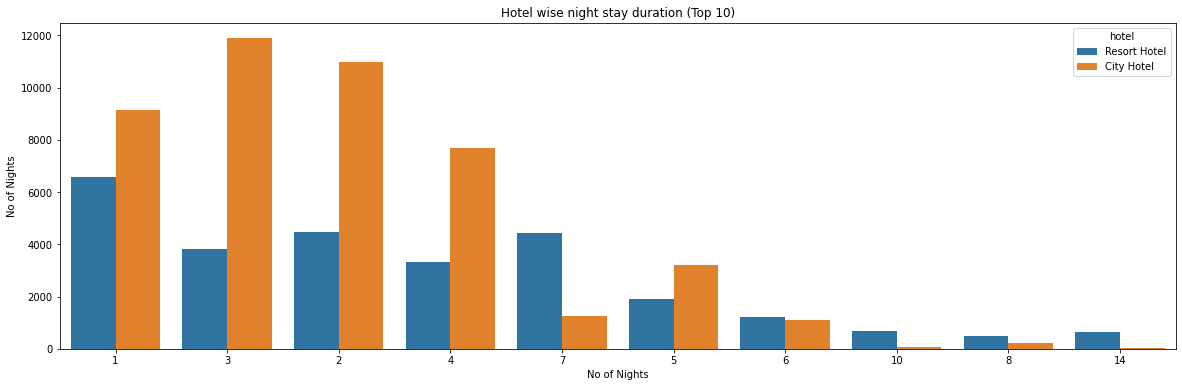

In [41]:
df_not_canceled.loc[:,'total_nights'] = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']

plt.figure(figsize=(20,6))
sns.countplot(x='total_nights', hue='hotel', data=df_not_canceled, order = df_not_canceled.total_nights.value_counts().iloc[:10].index);
plt.xlabel('No of Nights')
plt.ylabel('No of Nights')
plt.title('Hotel wise night stay duration (Top 10)')




> 




* **For Resort hotel, the most popular stay duration is three, two, one, and four days respectively.**
* **For City hotel, most popular stay duration is one, two, seven(week), and three respectively.**








**G.Trying to get the most booked accommodation type (Single, Couple, Family/Friends).**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Accommodation Type')

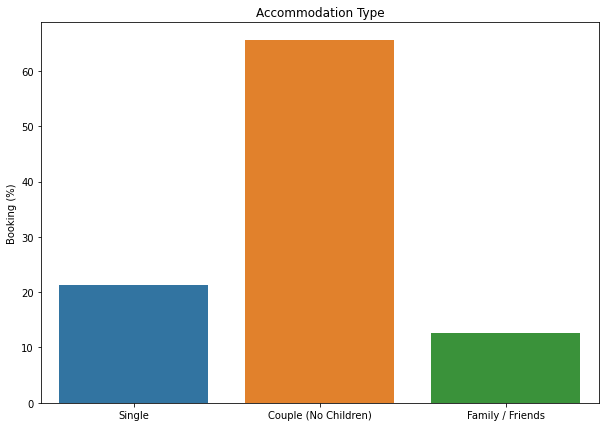

In [42]:
# Select single, couple, multiple adults and family/friends
single   = df_not_canceled[(df_not_canceled.adults==1) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
couple   = df_not_canceled[(df_not_canceled.adults==2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
# # adults = df_not_canceled[(df_not_canceled.adults>2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
family   = df_not_canceled[df_not_canceled.adults + df_not_canceled.children + df_not_canceled.babies > 2]


# ## Make the list of Category names, and their total percentage
names = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/df_not_canceled.shape[0]*100 for x in count]


## Draw the curve
plt.figure(figsize=(10,7))
sns.barplot(names,count_percent)
plt.ylabel('Booking (%)')
plt.title('Accommodation Type')





*  **Couple (or 2 adults) is the most popular accommodation type. So hotels can make plans accordingly**




## **Feature Selection and Feature Engineering**

In [43]:
#Copy the dataframe


In [44]:
df_subset = df_hba.copy()

In [45]:
#Remove reservation_status column

#because it tells us if booking was cancelled 


In [46]:
df_subset = df_subset.drop(['reservation_status'], axis=1)

In [47]:
#Make the new column which contain 1 if guest received the same room which was reserved otherwise 0

In [48]:
df_subset['Room'] = 0
df_subset.loc[ df_subset['reserved_room_type'] == df_subset['assigned_room_type'] , 'Room'] = 1

In [49]:
#Make the new column which contain 1 if the guest has cancelled more booking in the past than the number of booking he did not cancel, otherwise 0

In [50]:
df_subset['net_cancelled'] = 0
df_subset.loc[ df_subset['previous_cancellations'] > df_subset['previous_bookings_not_canceled'] , 'net_cancelled'] = 1

In [51]:
#Remove the less important features

In [52]:
df_subset = df_subset.drop(['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month',
                           'arrival_date_month','assigned_room_type','reserved_room_type','reservation_status_date',
                           'previous_cancellations','previous_bookings_not_canceled'],axis=1)


Plot the heatmap to see correlation with columns

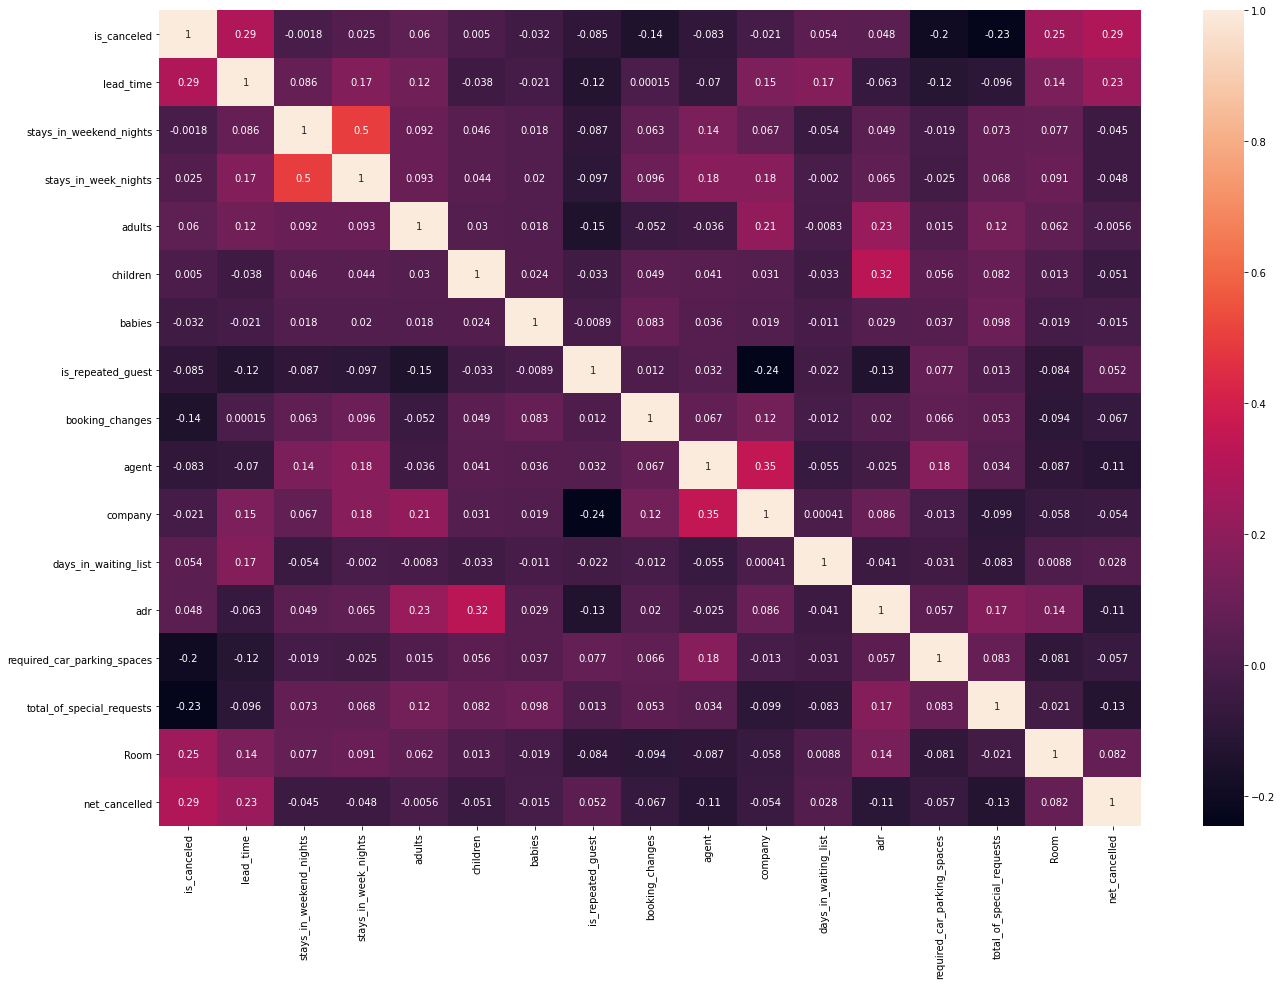

In [53]:
fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(df_subset.corr(), annot=True, ax=ax);
